## Trabajo Práctico 2: Redes Neuronales


Los parámetros que tendremos en cuenta al entrenar las redes neuronales seran:

+ Función de costo: Una forma para que la red entiende si predijo correctamente, en este caso como buscamos una clasificacion binaria utilizaremos binary cross entropy.
+ Optimizador: Es el algoritmo mediante el cual se optimiza el función de costo. En este caso probaremos los distintos optimizadores que nos probee keras: SGD, Adam, Adadelta, etc...
+ Tasa de aprendizaje: Es un parámetro que indica la velocidad con la cual el optimizador intenta acercarse el mínimo de la función de pérdida.
+ Funcion de activacion de las neuronas: Se aplica sobre el input de cada neurona, antes de multiplicarla por el peso correspondiente (El famoso pegamento no lineal).
+ Cantidad de capas y neuronas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

RANDOM_STATE = 19 * 103785
tf.random.set_seed(RANDOM_STATE)

from tensorflow.keras import regularizers
physical_devices = tf.config.list_physical_devices('GPU')

try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense,Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [2]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

In [3]:
from preprocesamiento import feature_engineering
from preprocesamiento import obtenerDFTraining
from preprocesamiento import preprocesar_data_frame

In [4]:
# Imprime las metricas Recall, Precision, Accuracy, Roc-auc y muestra la matriz de confuncion.
def metricas(y_real, y_pred, x_test, modelo):

    data = {'y_real': y_real,
            'y_pred': y_pred}

    df_metricas = pd.DataFrame(data, columns=['y_real','y_pred'])
    confusion_matrix = pd.crosstab(df_metricas['y_real'], df_metricas['y_pred'], rownames=['Real'], colnames=['Predicho'])
    sns.heatmap(confusion_matrix, annot=True, fmt="d")
    plt.show()

    print("Recall: {}".format(recall_score(y_real, y_pred).round(2)))
    print("Precision: {}".format(precision_score(y_real, y_pred).round(2)))
    print("Acc: {}".format(accuracy_score(y_real, y_pred).round(2)))
    print("Roc: {}".format(roc_auc_score(y_real, modelo.predict_proba(x_test)[:, 1]).round(2)))
    
def prepros_dummies(data):
    scaler = Normalizer()
    data_prepos = pd.get_dummies(data[['ganancia_perdida_declarada_bolsa_argentina','trabajo','horas_trabajo_registradas',
                                      'estado_marital','edad','genero','anios_estudiados','horas_trabajo_registradas']],
                                 drop_first= True)
    scaler.fit(data_prepos)
    return scaler.transform(data_prepos)

In [18]:
def plot_loss(history):
    plt.figure(dpi=125, figsize=(8, 4))
    plt.plot(history['loss'], label="loss")
    plt.plot(history['val_loss'], label="validation loss")
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.show() 
    
def plot_acc(history):
    plt.figure(dpi=125, figsize=(8, 4))
    plt.plot(history['accuracy'], label="accuracy")
    plt.plot(history['val_accuracy'], label="validation accuracy")
    plt.title('model accuracy')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

In [5]:
df = obtenerDFTraining()
(X,y) = preprocesar_data_frame(df)
X_prepos= prepros_dummies(X)

x_train, x_test, y_train, y_test = train_test_split(X_prepos, y, test_size=0.25, random_state=RANDOM_STATE)

Inicialmente probaremos con una unica capa oculta e iremos complejizando la red poco a poco

In [20]:
model = Sequential()
model.add(Dense(80, activation='relu',input_shape=(25,)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

model.summary()

h = model.fit(x_train, y_train, epochs=1200,batch_size=1000, verbose=0, validation_split=0.3)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 80)                2080      
_________________________________________________________________
dropout_6 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 81        
Total params: 2,161
Trainable params: 2,161
Non-trainable params: 0
_________________________________________________________________


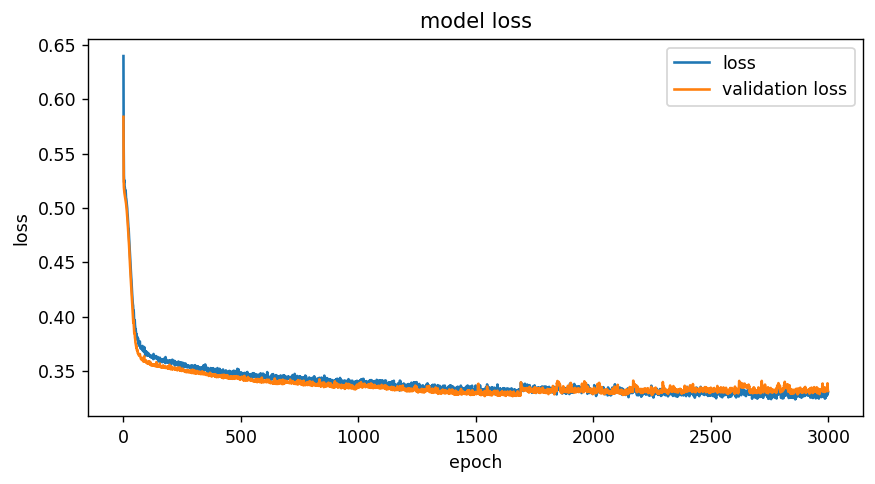

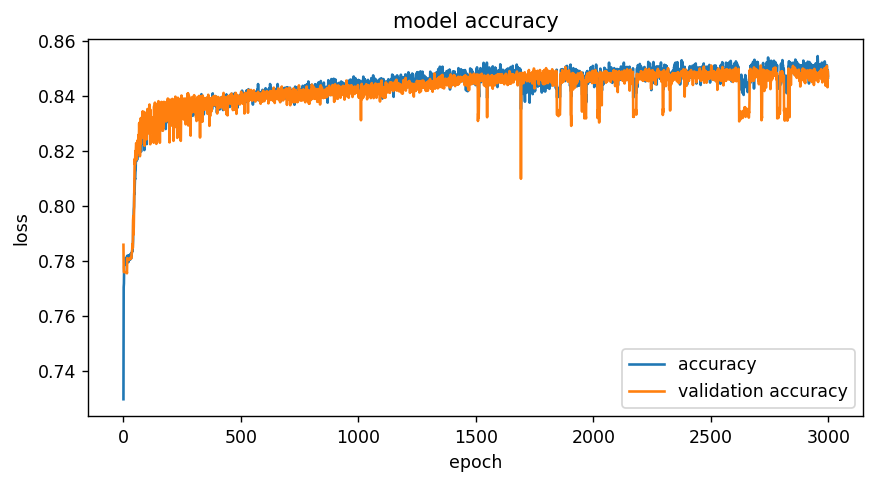

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6196
           1       0.72      0.54      0.62      1936

    accuracy                           0.84      8132
   macro avg       0.79      0.74      0.76      8132
weighted avg       0.83      0.84      0.83      8132



array([[2.7912411e-01],
       [9.8688763e-01],
       [9.8713802e-09],
       ...,
       [5.6770444e-04],
       [1.3753295e-02],
       [1.4845818e-02]], dtype=float32)

In [50]:
plot_loss(h.history)
plot_acc(h.history)
print(classification_report(y_test,h.model.predict_classes(x_test)))
h.model.predict_proba(x_test)

In [36]:
model = Sequential()
model.add(Dense(80, activation='relu',input_shape=(25,)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

model.summary()

h = model.fit(x_train, y_train, epochs=3000,batch_size=1000, verbose=0, validation_split=0.3)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 80)                2080      
_________________________________________________________________
dropout_17 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 10)                810       
_________________________________________________________________
dropout_18 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 11        
Total params: 2,901
Trainable params: 2,901
Non-trainable params: 0
_________________________________________________________________


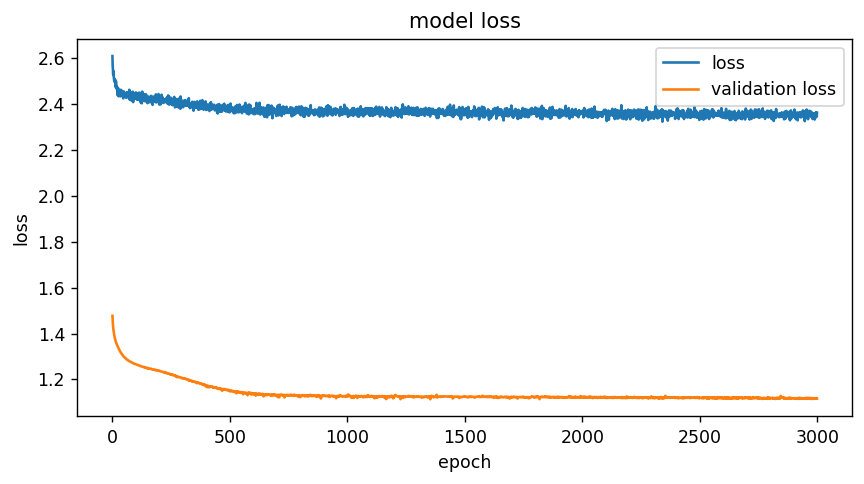

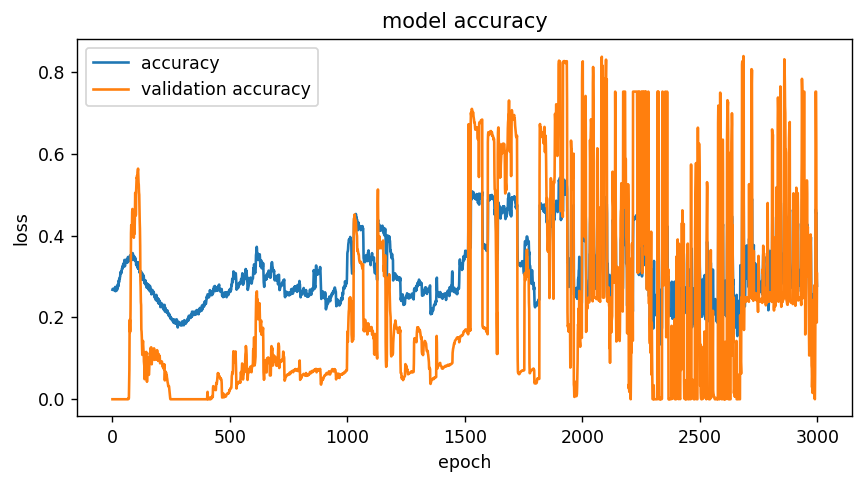

              precision    recall  f1-score   support

           0       0.82      0.40      0.54      6196
           1       0.00      0.00      0.00      1936
           2       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.30      8132
   macro avg       0.21      0.10      0.13      8132
weighted avg       0.63      0.30      0.41      8132



/home/mauricio/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mauricio/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
plot_loss(h.history)
plot_acc(h.history)
print(classification_report(y_test,h.model.predict_classes(x_test)))

In [38]:
pred_red_neuronal = h.model.predict(x_test)
pred = []
for i in range(0,len(pred_red_neuronal)):
    if (pred_red_neuronal[i] < 0.5):
        pred.append(0)
    else:
        pred.append(1)

m = tf.keras.metrics.AUC()
m.update_state(y_test,pred)
m.result().numpy()

0.7506184

In [39]:
model = Sequential()
model.add(Dense(80, activation='relu',input_shape=(25,)))
model.add(Dropout(0.5))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

model.summary()

h = model.fit(x_train, y_train, epochs=3000,batch_size=1000, verbose=0, validation_split=0.3)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 80)                2080      
_________________________________________________________________
dropout_19 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 20)                1620      
_________________________________________________________________
dropout_20 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 21        
Total params: 3,721
Trainable params: 3,721
Non-trainable params: 0
_________________________________________________________________


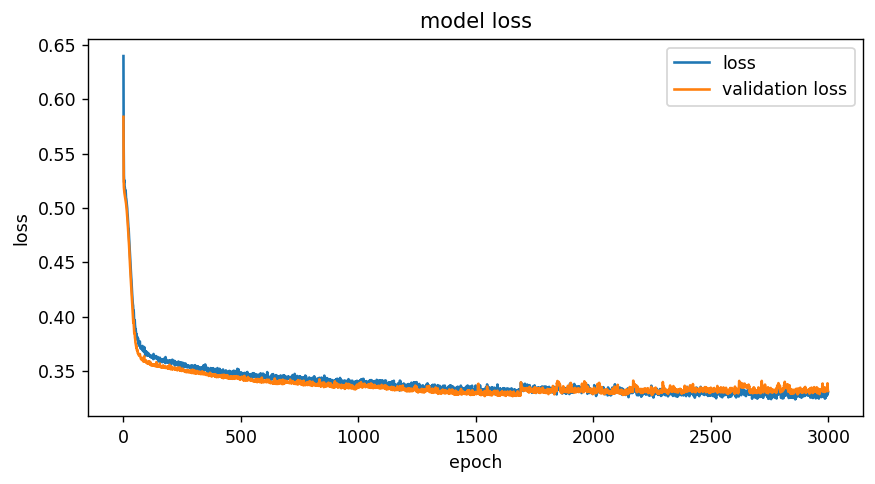

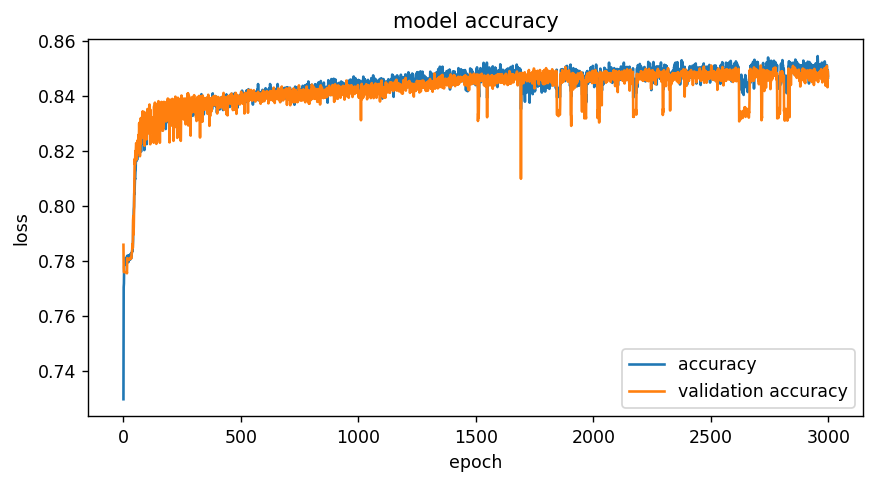

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6196
           1       0.72      0.54      0.62      1936

    accuracy                           0.84      8132
   macro avg       0.79      0.74      0.76      8132
weighted avg       0.83      0.84      0.83      8132



In [40]:
plot_loss(h.history)
plot_acc(h.history)
print(classification_report(y_test,h.model.predict(x_test,verbose =4 )>0.5))

In [68]:
model = Sequential()
model.add(Dense(80, activation='relu',input_shape=(25,)))
model.add(Dropout(0.5))
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

model.summary()

h = model.fit(x_train, y_train, epochs=4000,batch_size=1000, verbose=0, validation_split=0.3)

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 80)                2080      
_________________________________________________________________
dropout_44 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_66 (Dense)             (None, 40)                3240      
_________________________________________________________________
dropout_45 (Dropout)         (None, 40)                0         
_________________________________________________________________
dense_67 (Dense)             (None, 5)                 205       
_________________________________________________________________
dropout_46 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_68 (Dense)             (None, 1)               

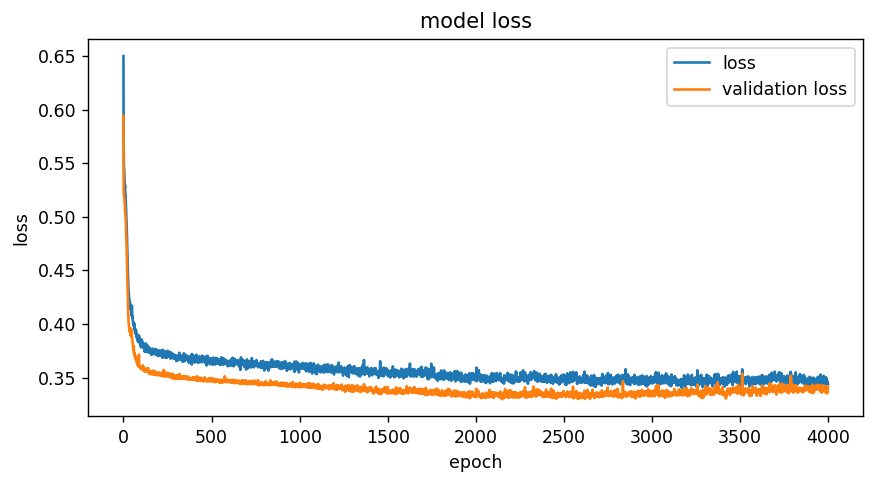

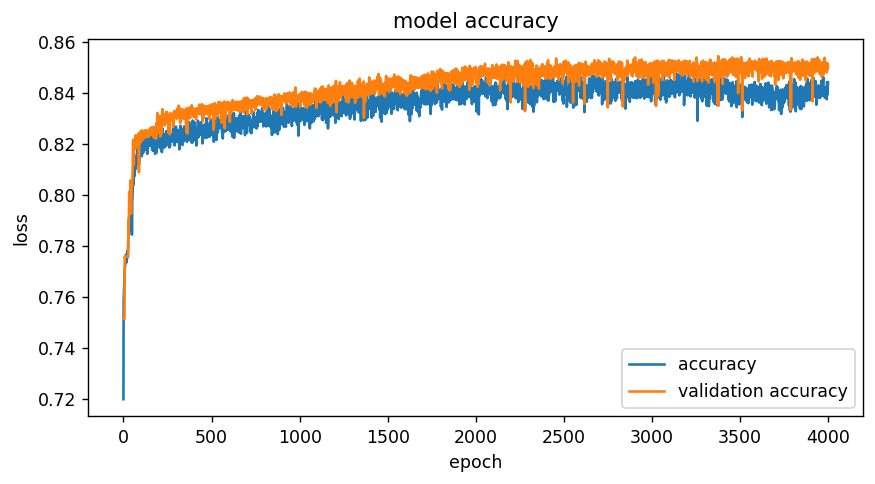

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6196
           1       0.72      0.56      0.63      1936

    accuracy                           0.84      8132
   macro avg       0.80      0.75      0.76      8132
weighted avg       0.84      0.84      0.84      8132



In [69]:
plot_loss(h.history)
plot_acc(h.history)
print(classification_report(y_test,h.model.predict_classes(x_test)))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 50)                1300      
_________________________________________________________________
dropout_7 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 12)                612       
_________________________________________________________________
dropout_8 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 13        
Total params: 1,925
Trainable params: 1,925
Non-trainable params: 0
_________________________________________________________________


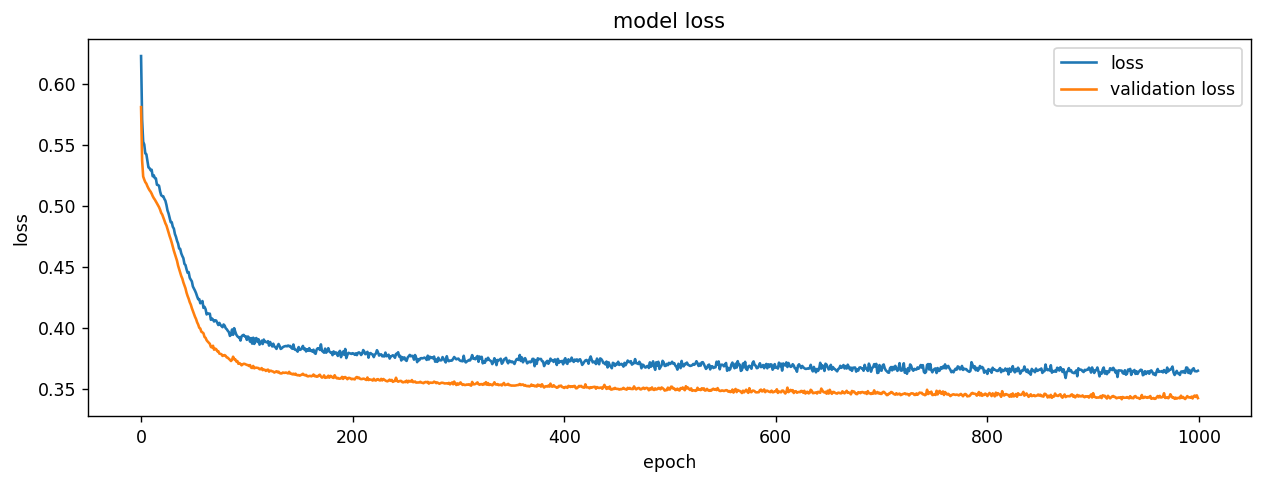

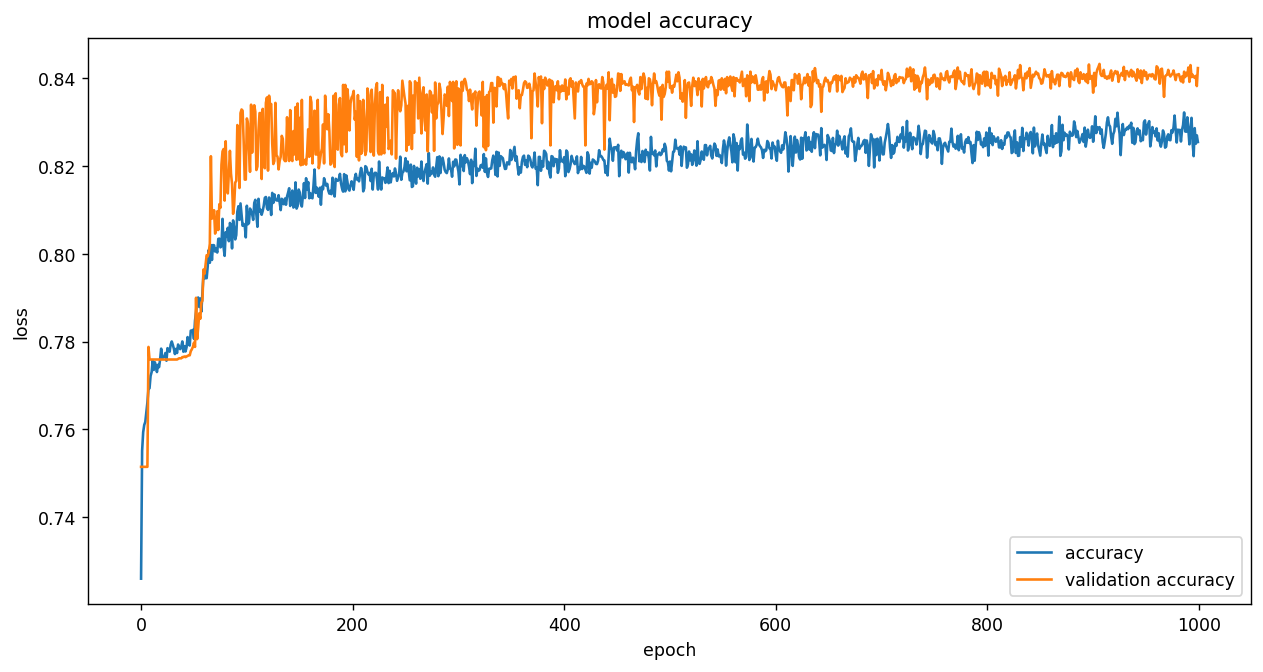

0.7386256

In [22]:
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(25,)))
model.add(Dropout(0.5))
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam()
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

model.summary()

h = model.fit(x_train, y_train, epochs=1000,batch_size=1000, verbose=0, validation_split=0.3)

plt.figure(dpi=125, figsize=(12, 4))
plt.plot(h.history['loss'], label="loss")
plt.plot(h.history['val_loss'], label="validation loss")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

plt.figure(dpi=125, figsize=(12, 6))
plt.plot(h.history['accuracy'], label="accuracy")
plt.plot(h.history['val_accuracy'], label="validation accuracy")
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

pred_red_neuronal = h.model.predict(x_test)
pred = []
for i in range(0,len(pred_red_neuronal)):
    if (pred_red_neuronal[i] < 0.5):
        pred.append(0)
    else:
        pred.append(1)

m = tf.keras.metrics.AUC()
m.update_state(y_test,pred)
m.result().numpy()

In [9]:


print(classification_report(y_test,h.model.predict(x_test,verbose =4 )>0.5))
print(classification_report(y_test,h.model.predict(x_test,verbose =4 )>0.45))
print(classification_report(y_test,h.model.predict(x_test,verbose =4 )>0.40))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      6196
           1       0.70      0.52      0.60      1936

    accuracy                           0.83      8132
   macro avg       0.78      0.73      0.75      8132
weighted avg       0.82      0.83      0.83      8132

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      6196
           1       0.68      0.56      0.62      1936

    accuracy                           0.83      8132
   macro avg       0.78      0.74      0.76      8132
weighted avg       0.83      0.83      0.83      8132

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      6196
           1       0.66      0.60      0.63      1936

    accuracy                           0.83      8132
   macro avg       0.77      0.75      0.76      8132
weighted avg       0.82      0.83      0.83      8132

